In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

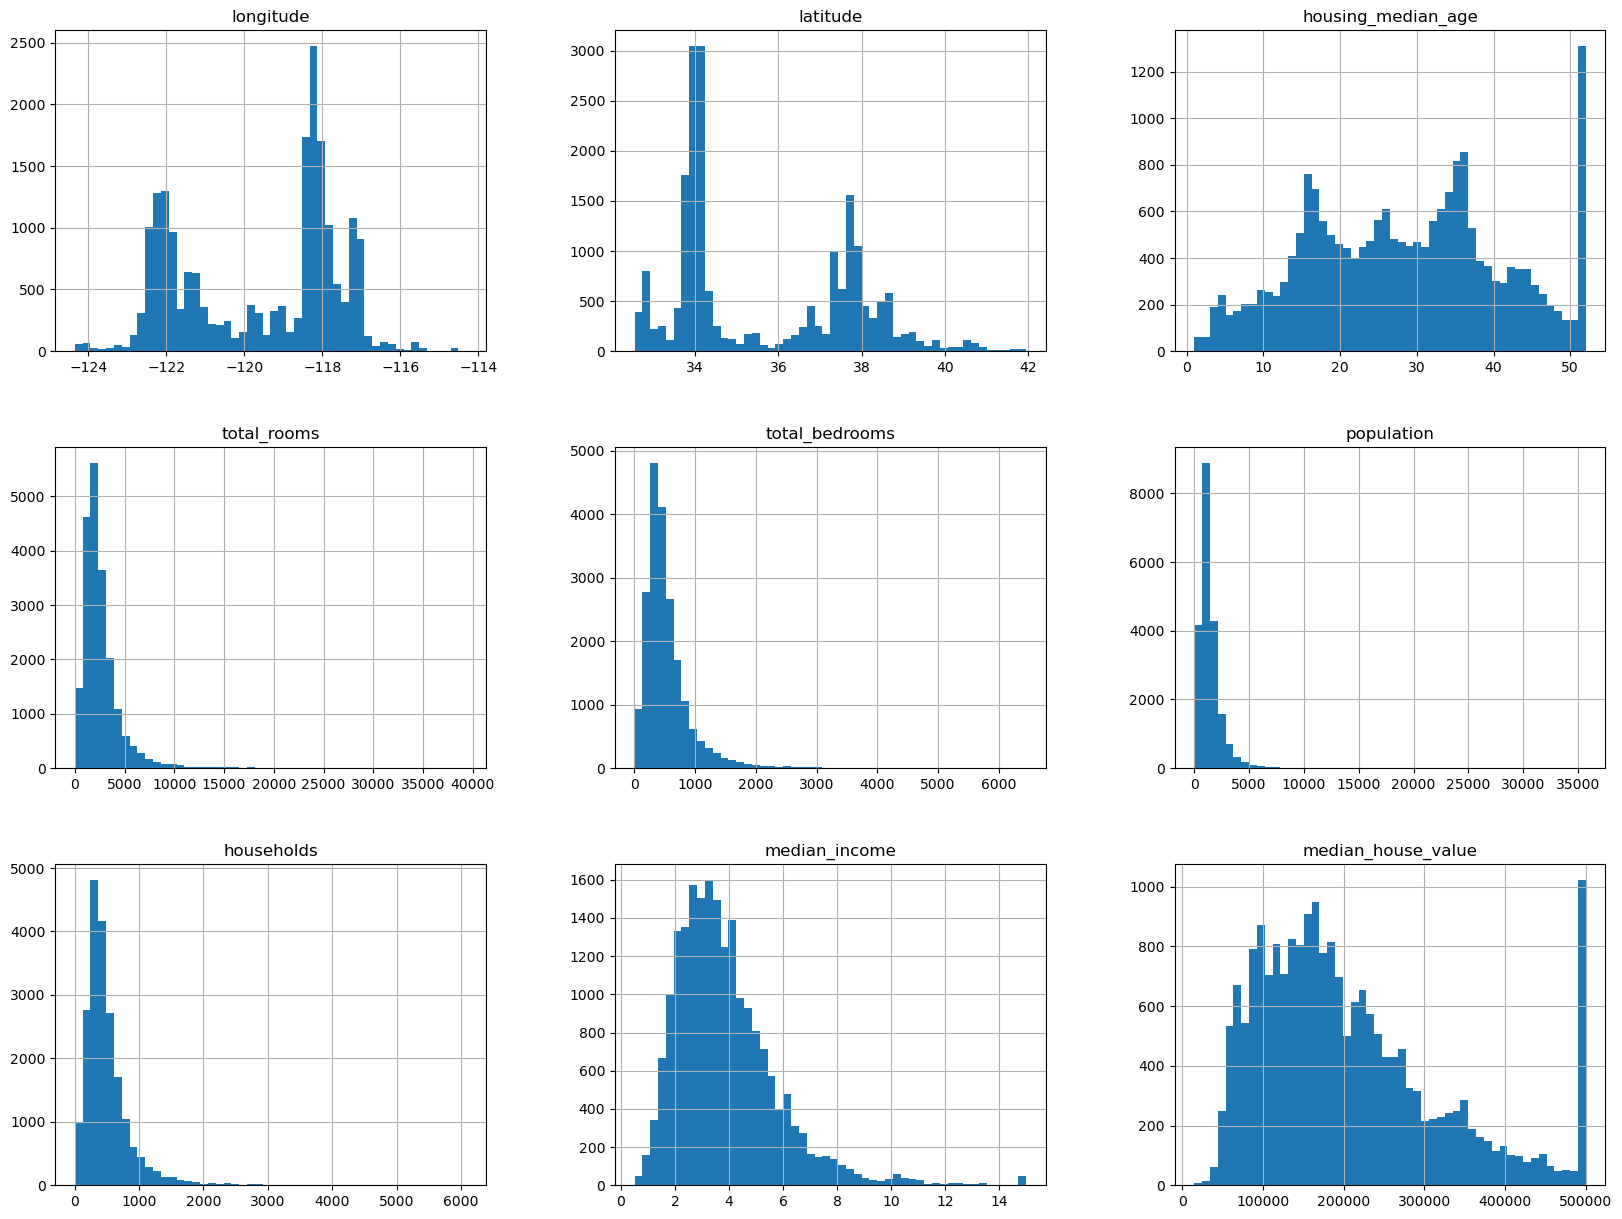

In [50]:
data.hist(bins=50, figsize=(20, 15))

<Axes: >

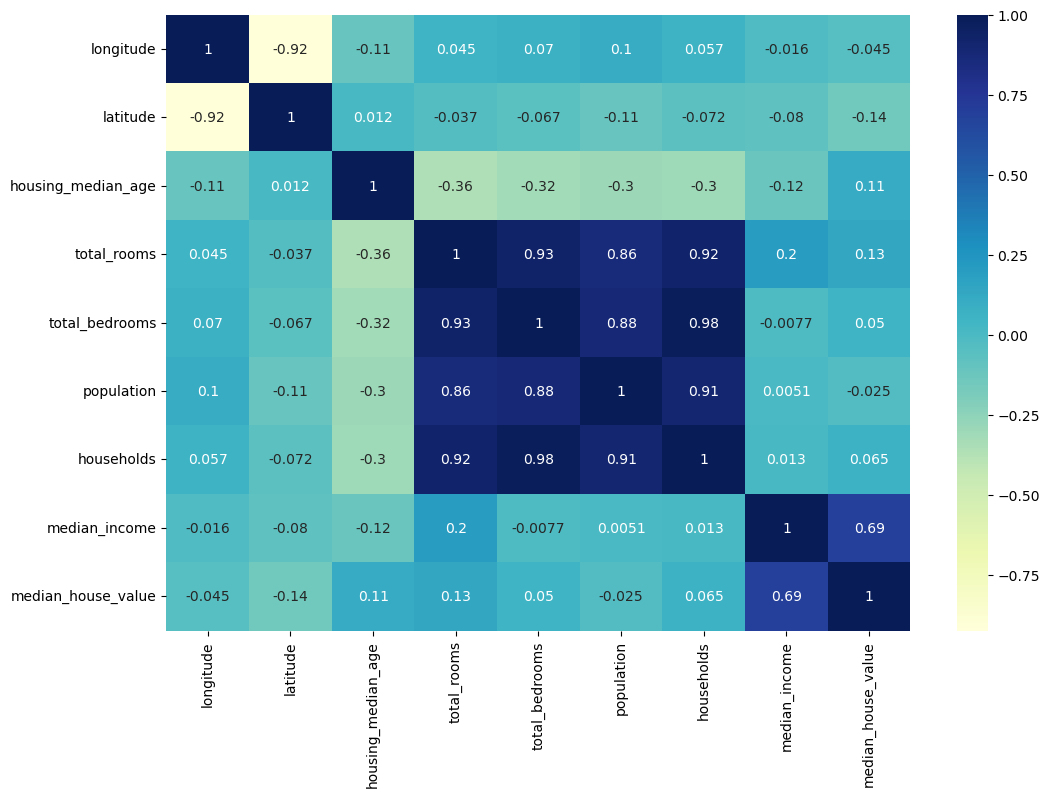

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

In [53]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for column in self.columns:
            X_copy[column] = np.log(X_copy[column] + 1)
        return X_copy

In [54]:
log_transform_columns = ['total_rooms', 'total_bedrooms', 'population', 'households']
cat_columns = ['ocean_proximity']

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('log', LogTransformer(columns=log_transform_columns), log_transform_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ],
    remainder='passthrough'
)

In [56]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [57]:
transformed_data = pipeline.fit_transform(data)

feature_names = (
    list(log_transform_columns) +
    list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_columns))
)


In [58]:
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

transformed_df.hist(bins=50, figsize=(20, 15))

ValueError: Shape of passed values is (20433, 14), indices imply (20433, 9)